## Lab Exercise Week \#3: Decision Trees in Machine Learning

### Objective:
The goal of this lab exercise is to understand Decision Trees and their application in machine learning. You will apply a decition tree classifier to different datasets and plot the resulting trees.

### Datasets:
For this lab exercise, you'll use the ApplePears, AthleteSelection, Restaurant and Penguins datasets from Brightspace.

### Tasks:

#### 1). Data Loading and Exploration:
<ul>
<li>Import all needed libraries.</li>
<li>Load the ApplePears dataset.</li>
<li>Explore the dataset to understand its structure and features.</li>
<li>Select approprate features for a decision tree.</li>
</ul>

In [23]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [4]:
apears = pd.read_csv('ApplesPears.csv')
apears.head()

,Greeness,Height,Width,Taste,Weight,H/W,Class
0,210,60,62,Sweet,186,0.97,Apple
1,220,70,53,Sweet,180,1.32,Pear
2,215,55,50,Tart,152,1.10,Apple
3,180,76,40,Sweet,152,1.90,Pear
4,220,68,45,Sweet,153,1.51,Pear


scikit-learn can deal with a category class label but it cannot deal with categorical features.
So we drop the Taste feature.

See later in the notebook for how to deal with categorical features

In [5]:
y = apears.pop('Class').values
apears.pop('Taste')    # Can't deal with category features
ap_features = apears.columns
X = apears.values
X[0]

array([210.  ,  60.  ,  62.  , 186.  ,   0.97])

In [6]:
ap_features

Index(['Greeness', 'Height', 'Width', 'Weight', 'H/W'], dtype='object')

In [7]:
y

array(['Apple', 'Pear', 'Apple', 'Pear', 'Pear', 'Apple', 'Pear', 'Apple',
       'Apple', 'Apple'], dtype=object)

In [8]:
apears # taste has been removed

,Greeness,Height,Width,Weight,H/W
0,210,60,62,186,0.97
1,220,70,53,180,1.32
2,215,55,50,152,1.10
3,180,76,40,152,1.90
4,220,68,45,153,1.51
5,160,65,68,221,0.96
6,215,63,45,140,1.40
7,180,55,56,154,0.98
8,220,68,65,221,1.05
9,190,60,58,174,1.03


In [9]:
X

array([[210.  ,  60.  ,  62.  , 186.  ,   0.97],
       [220.  ,  70.  ,  53.  , 180.  ,   1.32],
       [215.  ,  55.  ,  50.  , 152.  ,   1.1 ],
       [180.  ,  76.  ,  40.  , 152.  ,   1.9 ],
       [220.  ,  68.  ,  45.  , 153.  ,   1.51],
       [160.  ,  65.  ,  68.  , 221.  ,   0.96],
       [215.  ,  63.  ,  45.  , 140.  ,   1.4 ],
       [180.  ,  55.  ,  56.  , 154.  ,   0.98],
       [220.  ,  68.  ,  65.  , 221.  ,   1.05],
       [190.  ,  60.  ,  58.  , 174.  ,   1.03]])

#### 2) Decision Tree for Apples and Pears:
<ul>
<li>Create a decision tree classifier.</li>
<li>Train your model.</li>
<li>Predict the outcome.</li>
<li>Plot the decision tree model.</li>
</ul>

Two key methods:
1. `fit` method will train the tree from the data.
2. `predict` method will produce class predictions for an array of test data. 

In [10]:
dtree = DecisionTreeClassifier(criterion='entropy')
ap_tree = dtree.fit(apears, y)

/Users/bbozic/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/bbozic/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/bbozic/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [12]:
ap_tree.predict([X[2]])
# predicts apple correctly

/Users/bbozic/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Apple'], dtype=object)

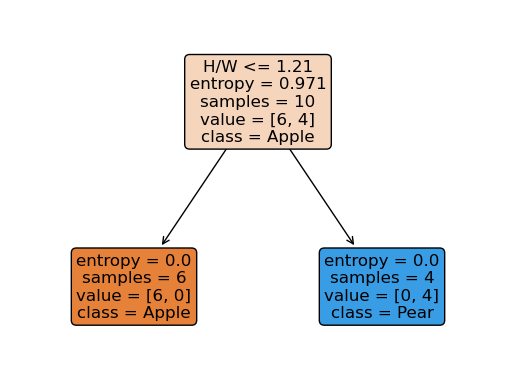

In [13]:
tree.plot_tree(ap_tree, feature_names=ap_features, fontsize = 12,
                      class_names=['Apple','Pear'],  
                      filled=True, rounded=True) 
None # supressing the verbose return from plot_tree

#### 3) Decision Tree for Athletes:
<ul>
<li>Load the AthleteSelection.csv dataset</li>
<li>Create a decision tree classifier.</li>
<li>Train your model.</li>
<li>Predict the outcome.</li>
<li>Plot the decision tree model.</li>
</ul>

In [15]:
athlete = pd.read_csv('AthleteSelection.csv',index_col = 'Athlete')
athlete.head()

,Speed,Agility,Selected
Athlete,,,
x1,2.50,6.00,No
x2,3.75,8.00,No
x3,2.25,5.50,No
x4,3.25,8.25,No
x5,2.75,7.50,No


In [16]:
y = athlete.pop('Selected').values
X = athlete.values

In [17]:
atree = DecisionTreeClassifier(criterion='gini')
atree = atree.fit(X,y)

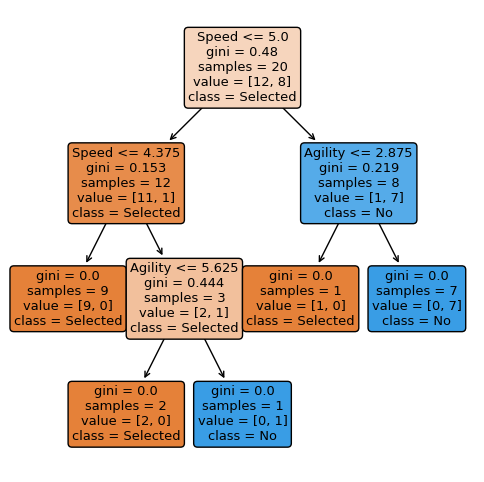

In [18]:
fig, ax = plt.subplots(figsize=(6, 6))
tree.plot_tree(atree, feature_names=['Speed','Agility'],  
                      class_names=['Selected','No'],  
                      filled=True, rounded=True,)
None # supressing the verbose return from plot_tree

Run a test example, select one of the training examples

In [19]:
y_pred = atree.predict([X[5]])
print('Prediced class label:',y_pred[0])

Prediced class label: No


#### 4) Decision Tree for Restaurants:
<ul>
    <li>Import the restaurant.csv dataset</li>
    <li>Use one-hot encoding to deal with categorical features.</li>
<li>Create a decision tree classifier.</li>
<li>Train your model.</li>
<li>Plot the decision tree model.</li>
</ul>

In [20]:
restaurant = pd.read_csv('restaurant.csv', index_col = 'No')
restaurant.head()

,Alternate,Bar,Fri/Sat,Hungry,Patrons,Price,Raining,Reservation,Type,WaitEst,WillWait?
No,,,,,,,,,,,
1,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10,Yes
2,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
3,No,Yes,No,No,Some,$,No,No,Burger,0-10,Yes
4,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30,Yes
5,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No


In [21]:
y = restaurant.pop('WillWait?').values
X = restaurant.values
X[:3,]

array([['Yes', 'No', 'No', 'Yes', 'Some', '$$$', 'No', 'Yes', 'French',
        '0-10'],
       ['Yes', 'No', 'No', 'Yes', 'Full', '$', 'No', 'No', 'Thai',
        '30-60'],
       ['No', 'Yes', 'No', 'No', 'Some', '$', 'No', 'No', 'Burger',
        '0-10']], dtype=object)

In [24]:
onehot_encoder = OneHotEncoder(sparse=False)  # We can add drop='first' 
restOH = onehot_encoder.fit(restaurant)
restOH_data = restOH.transform(restaurant)

In [25]:
restaurant.columns

Index(['Alternate', 'Bar', 'Fri/Sat', 'Hungry', 'Patrons', 'Price', 'Raining',
       'Reservation', 'Type', 'WaitEst'],
      dtype='object')

In [26]:
restOH.get_feature_names_out(restaurant.columns)

array(['Alternate_No', 'Alternate_Yes', 'Bar_No', 'Bar_Yes', 'Fri/Sat_No',
       'Fri/Sat_Yes', 'Hungry_No', 'Hungry_Yes', 'Patrons_Full',
       'Patrons_Some', 'Patrons_nan', 'Price_$', 'Price_$$', 'Price_$$$',
       'Raining_No', 'Raining_Yes', 'Reservation_No', 'Reservation_Yes',
       'Type_Burger', 'Type_French', 'Type_Italian', 'Type_Thai',
       'WaitEst_0-10', 'WaitEst_10-30', 'WaitEst_30-60', 'WaitEst_>60'],
      dtype=object)

In [27]:
# this is the number of features now in the dataset

restOH.get_feature_names_out(restaurant.columns).size

# Add the drop='first' parameter to the encoding and see how many features you end up with 

26

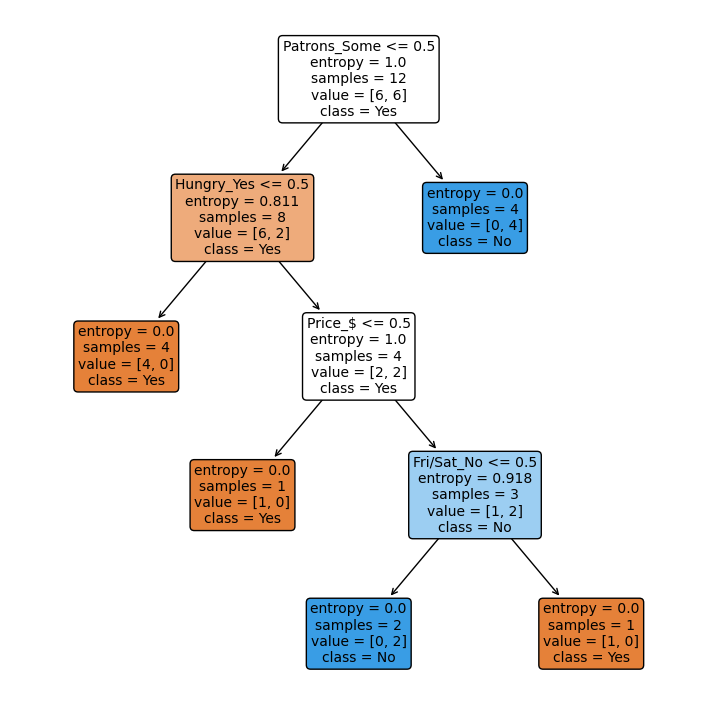

In [28]:
rtree = DecisionTreeClassifier(criterion='entropy')
rtreeOH = rtree.fit(restOH_data,y)
fig, ax = plt.subplots(figsize=(9, 9))
tree.plot_tree(rtreeOH, feature_names=restOH.get_feature_names_out(restaurant.columns),
                      class_names=['Yes','No'], fontsize = 10, 
                      filled=True, rounded=True)
None # supressing the verbose return from plot_tree